# APA Laboratori 7  - SVMs 

## Modelling artificial 2D sinusoidal data for two-class problems

The SVM is located in two different packages: one of them is 'e1071'

In [1]:
library(e1071)

First we create a simple two-class data set:

In [2]:
N <- 200

make.sinusoidals <- function(m,noise=0.2) 
{
  x1 <- c(1:2*m)
  x2 <- c(1:2*m)
  
  for (i in 1:m) {
    x1[i] <- (i/m) * pi
    x2[i] <- sin(x1[i]) + rnorm(1,0,noise)
  }
  
  for (j in 1:m) {
    x1[m+j] <- (j/m + 1/2) * pi
    x2[m+j] <- cos(x1[m+j]) + rnorm(1,0,noise)
  }
  
  target <- as.factor(c(rep(+1,m),rep(-1,m)))
  
  return(data.frame(x1,x2,target))
}

 let's generate the data

In [3]:
dataset <- make.sinusoidals (N)

and have a look at it

In [4]:
summary(dataset)

       x1                x2           target  
 Min.   :0.01571   Min.   :-1.74954   -1:200  
 1st Qu.:1.58258   1st Qu.:-0.65645   1 :200  
 Median :2.36405   Median :-0.03059           
 Mean   :2.36405   Mean   :-0.01889           
 3rd Qu.:3.14552   3rd Qu.: 0.61058           
 Max.   :4.71239   Max.   : 1.49578           

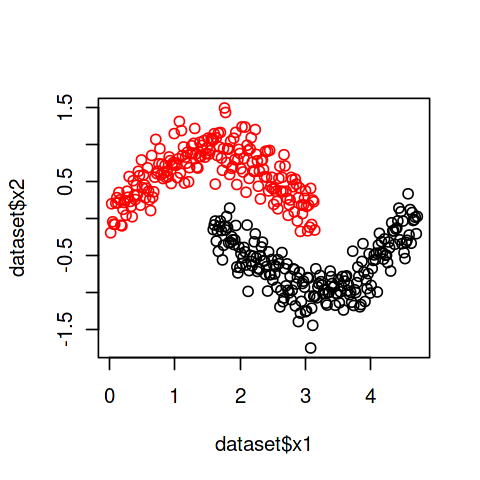

In [5]:
options(repr.plot.width=4, repr.plot.height=4)
plot(dataset$x1,dataset$x2,col=dataset$target)

Now we wish to fit and visualize different SVM models

### model 1: LINEAR kernel, C=1 (cost parameter)

In [6]:
(model <- svm(dataset[,1:2],dataset[,3], type="C-classification", cost=1, kernel="linear", scale = FALSE))


Call:
svm.default(x = dataset[, 1:2], y = dataset[, 3], scale = FALSE, 
    type = "C-classification", kernel = "linear", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  54


 Now we are going to visualize what we have done; since we have artificial data, instead of creating
 a random test set, we can create a grid of points as test

In [7]:
plot.prediction <- function (model, model.name, resol=200)
# the grid has a (resol x resol) resolution
{
  x <- cbind(dataset$x1,dataset$x2)
  rng <- apply(x,2,range);
  tx <- seq(rng[1,1],rng[2,1],length=resol);
  ty <- seq(rng[1,2],rng[2,2],length=resol);
  pnts <- matrix(nrow=length(tx)*length(ty),ncol=2);
  k <- 1
  for(j in 1:length(ty))
  {
    for(i in 1:length(tx))
    {
      pnts[k,] <- c(tx[i],ty[j])
      k <- k+1
    } 
  }

#  we calculate the predictions on the grid

pred <- predict(model, pnts, decision.values = TRUE)
  
z <- matrix(attr(pred,"decision.values"),nrow=length(tx),ncol=length(ty))

# and plot them

  
  image(tx,ty,z,xlab=model.name,ylab="",axes=FALSE,
        xlim=c(rng[1,1],rng[2,1]),ylim=c(rng[1,2],rng[2,2]),
        col = rainbow(200, start=0, end=.25))

  
  # then we draw the optimal separation and its margins

  
  contour(tx,ty,z,add=TRUE, drawlabels=TRUE, level=0, lwd=3)
  contour(tx,ty,z,add=TRUE, drawlabels=TRUE, level=1, lty=1, lwd=1, col="grey")
  contour(tx,ty,z,add=TRUE, drawlabels=TRUE, level=-1, lty=1, lwd=1, col="grey")
  
  # then we plot the input data from the two classes
  
  points(dataset[dataset$target==1,1:2],pch=21,col=1,cex=1)
  points(dataset[dataset$target==-1,1:2],pch=19,col=4,cex=1)
  
  # finally we add the SVs
  
  sv <- dataset[c(model$index),];
  sv1 <- sv[sv$target==1,];
  sv2 <- sv[sv$target==-1,];
  points(sv1[,1:2],pch=13,col=1,cex=2)
  points(sv2[,1:2],pch=13,col=4,cex=2)
}

<div class="alert alert-block alert-info"> make sure you understand the following results (one by one and their differences)</div>

plot the data, the OSH with margins, the support vectors, ...

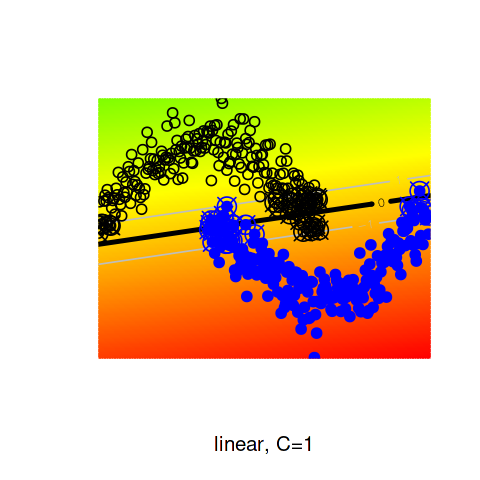

In [8]:
plot.prediction (model, "linear, C=1")

 ### model 2: linear kernel, C=0.1 (cost parameter)

In [9]:
(model <- svm(dataset[,1:2],dataset[,3], type="C-classification", cost=0.1, kernel="linear", scale = FALSE))


Call:
svm.default(x = dataset[, 1:2], y = dataset[, 3], scale = FALSE, 
    type = "C-classification", kernel = "linear", cost = 0.1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.5 

Number of Support Vectors:  99


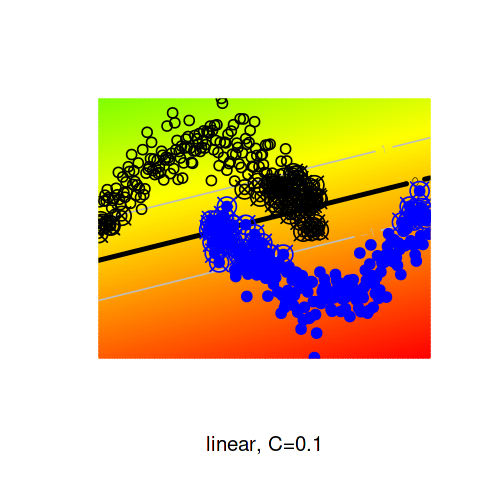

In [10]:
plot.prediction (model, "linear, C=0.1")

the margin is wider (lower VC dimension), number of support vectors is larger (more violations of the margin)

### model 3: linear kernel, C=25 (cost parameter)

In [11]:
(model <- svm(dataset[,1:2],dataset[,3], type="C-classification", cost=25, kernel="linear", scale = FALSE))


Call:
svm.default(x = dataset[, 1:2], y = dataset[, 3], scale = FALSE, 
    type = "C-classification", kernel = "linear", cost = 25)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  25 
      gamma:  0.5 

Number of Support Vectors:  36


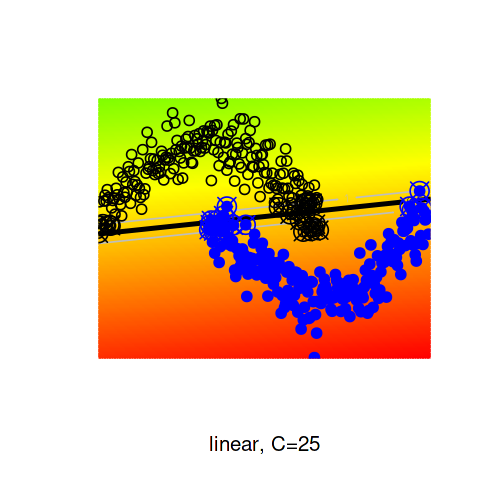

In [12]:
plot.prediction (model, "linear, C=25")

the margin is narrower (higher VC dimension), number of support vectors is smaller (less violations of the margin)

Let's put it together, for 6 values of C:

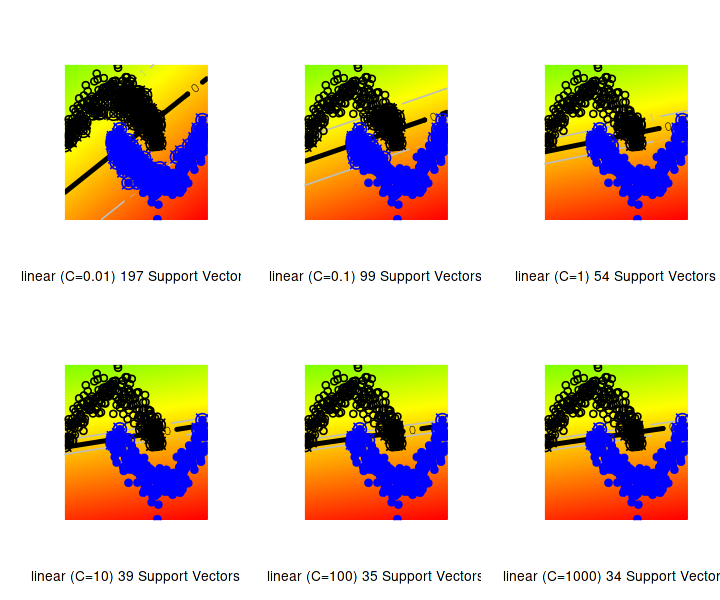

In [13]:
options(repr.plot.width=6, repr.plot.height=5)
par(mfrow=c(2,3))

for (C in 10^seq(-2,3))
{
  model <- svm(dataset[,1:2],dataset[,3], type="C-classification", cost=C, kernel="linear", scale = FALSE)
  plot.prediction (model, paste ("linear (C=", C, ") ", model$tot.nSV, " Support Vectors", sep=""))
}

Now we move to a QUADRATIC kernel (polynomial of degree 2); the kernel has the form:

$k(x,y) = (\lt x,y\gt + coef0)^{degree}$

 quadratic kernel, C=1 (cost parameter)

In [14]:
(model <- svm(dataset[,1:2],dataset[,3], type="C-classification", cost=1, kernel="polynomial", degree=2, coef0=1, scale = FALSE))


Call:
svm.default(x = dataset[, 1:2], y = dataset[, 3], scale = FALSE, 
    type = "C-classification", kernel = "polynomial", degree = 2, 
    coef0 = 1, cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  2 
      gamma:  0.5 
     coef.0:  1 

Number of Support Vectors:  46


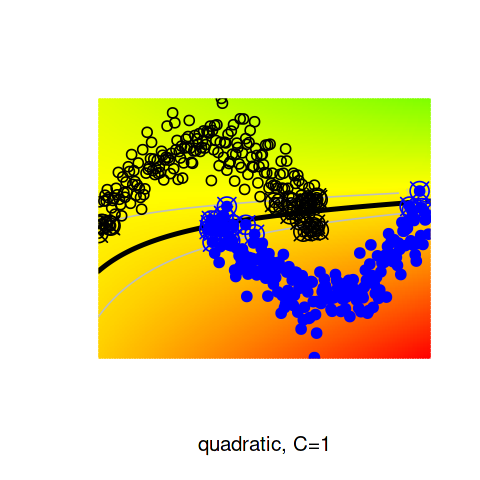

In [15]:
options(repr.plot.width=4, repr.plot.height=4)
par(mfrow=c(1,1))

plot.prediction (model, "quadratic, C=1")

 notice that neither the OSH or the margins are linear (they are quadratic); they are linear in the feature space
 in the previous linear kernel, both spaces coincide

Let's put it together directly, for 6 values of C:

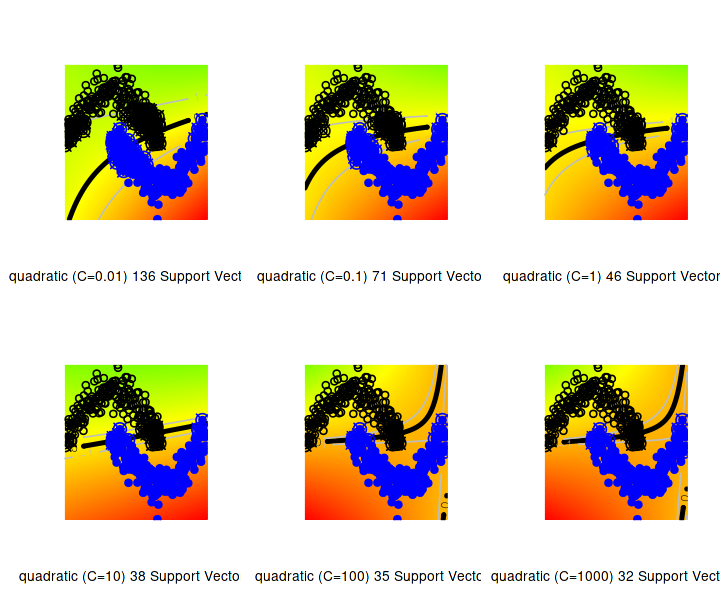

In [16]:
options(repr.plot.width=6, repr.plot.height=5)
par(mfrow=c(2,3))

for (C in 10^seq(-2,3))
{
  model <- svm(dataset[,1:2],dataset[,3], type="C-classification", cost=C, kernel="polynomial", degree=2, coef0=1, scale = FALSE)
  plot.prediction (model, paste ("quadratic (C=", C, ") ", model$tot.nSV, " Support Vectors", sep=""))
}

Now we move to a CUBIC kernel (polynomial of degree 3); the kernel has the form:

$k(x,y) = (\lt x,y \gt + coef0)^{degree}$

 cubic kernel, C=1 (cost parameter)

In [17]:
(model <- svm(dataset[,1:2],dataset[,3], type="C-classification", cost=1, kernel="polynomial", degree=3, coef0=1, scale = FALSE))


Call:
svm.default(x = dataset[, 1:2], y = dataset[, 3], scale = FALSE, 
    type = "C-classification", kernel = "polynomial", degree = 3, 
    coef0 = 1, cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  3 
      gamma:  0.5 
     coef.0:  1 

Number of Support Vectors:  36


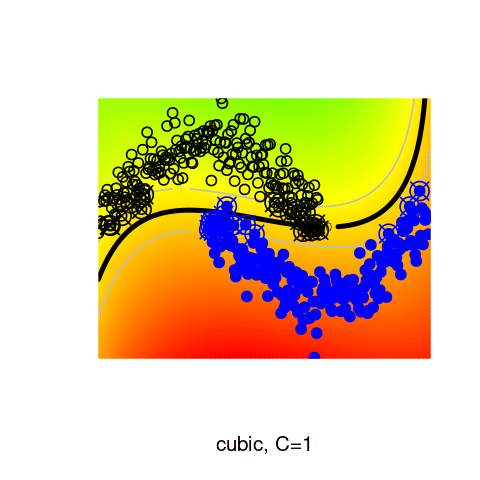

In [18]:
options(repr.plot.width=4, repr.plot.height=4)
par(mfrow=c(1,1))

plot.prediction (model, "cubic, C=1")

 notice that neither the OSH or the margins are linear (they are now cubic); they are linear in the feature space
 this choice seems much better, given the structure of the classes

Let's put it together directly, for 6 values of C:

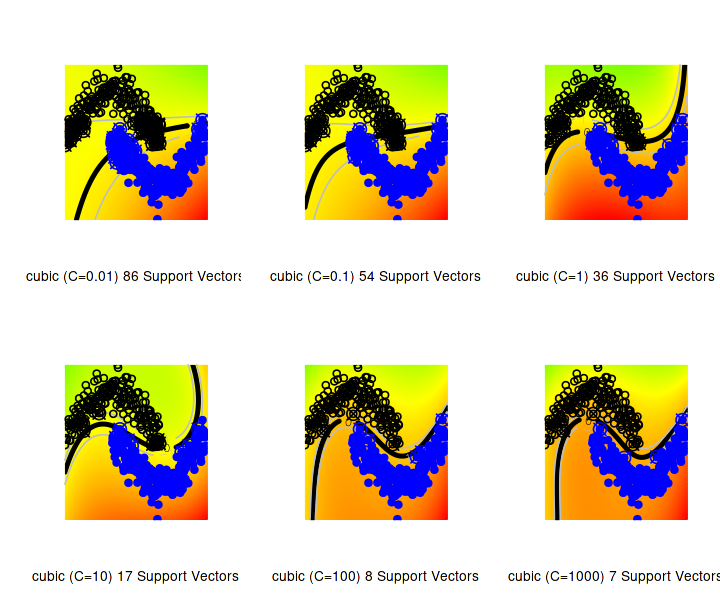

In [19]:
options(repr.plot.width=6, repr.plot.height=5)
par(mfrow=c(2,3))

for (C in 10^seq(-2,3))
{
  model <- svm(dataset[,1:2],dataset[,3], type="C-classification", cost=C, kernel="polynomial", degree=3, coef0=1, scale = FALSE)
  plot.prediction (model, paste ("cubic (C=", C, ") ", model$tot.nSV, " Support Vectors", sep=""))
}

Finally we use the Gaussian RBF kernel (polynomial of infinite degree; the kernel has the form:

$k(x,y) = exp(-gamma·||x - y||^2)$

RBF kernel, C=1 (cost parameter)

In [20]:
(model <- svm(dataset[,1:2],dataset[,3], type="C-classification", cost=1, kernel="radial", scale = FALSE))


Call:
svm.default(x = dataset[, 1:2], y = dataset[, 3], scale = FALSE, 
    type = "C-classification", kernel = "radial", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  32


the default value for gamma is 0.5

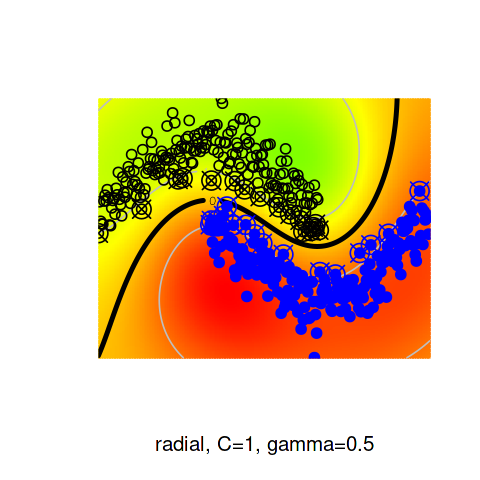

In [21]:
options(repr.plot.width=4, repr.plot.height=4)
par(mfrow=c(1,1))

plot.prediction (model, "radial, C=1, gamma=0.5")

 Let's put it together directly, for 6 values of C, holding gamma constant = 0.5:

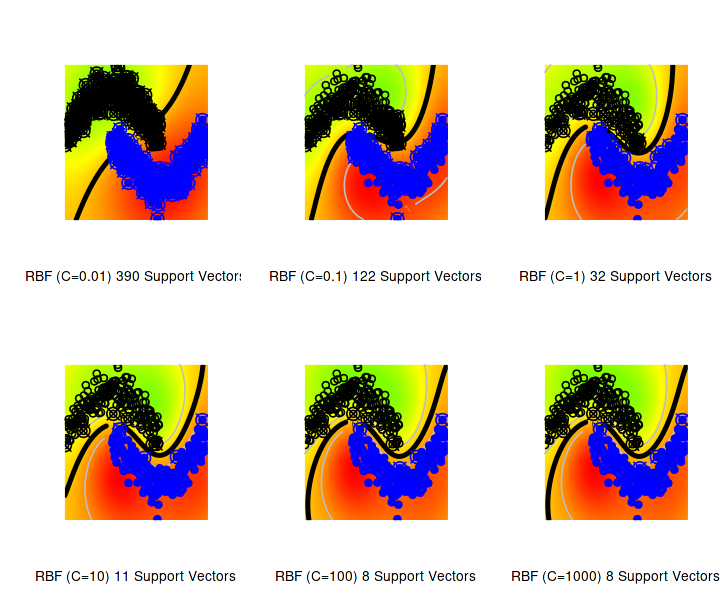

In [22]:
options(repr.plot.width=6, repr.plot.height=5)
par(mfrow=c(2,3))

for (C in 10^seq(-2,3))
{
  model <- svm(dataset[,1:2],dataset[,3], type="C-classification", cost=C, kernel="radial", scale = FALSE)
  plot.prediction (model, paste ("RBF (C=", C, ") ", model$tot.nSV, " Support Vectors", sep=""))
}

 Now for 8 values of gamma, holding C constant = 1:

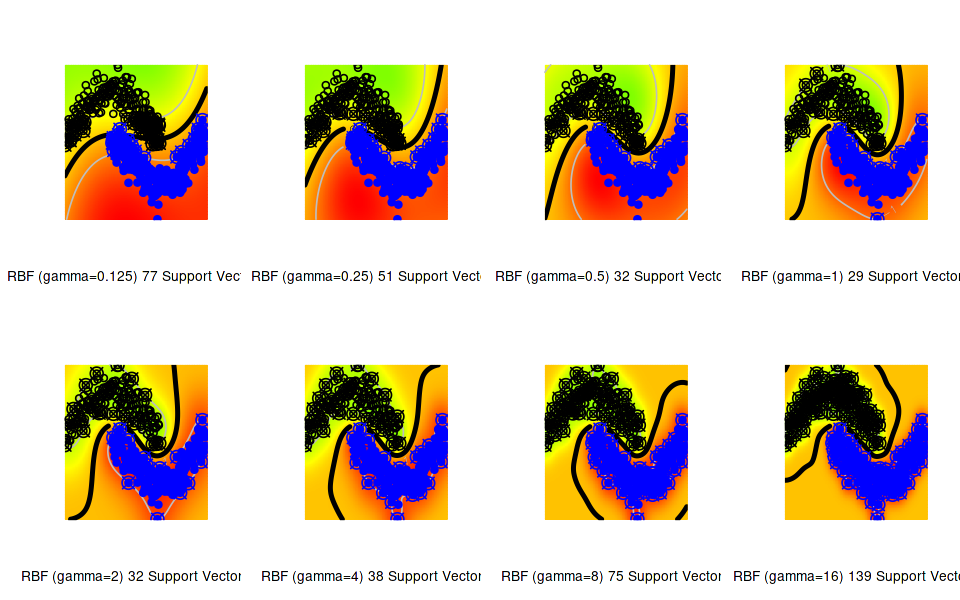

In [23]:
options(repr.plot.width=8, repr.plot.height=5)
par(mfrow=c(2,4))

for (g in 2^seq(-3,4))
{
  model <- svm(dataset[,1:2],dataset[,3], type="C-classification", cost=1, kernel="radial", gamma=g, scale = FALSE)
  plot.prediction (model, paste ("RBF (gamma=", g, ") ", model$tot.nSV, " Support Vectors", sep=""))
}

 In practice we should optimize both (C,gamma) at the same time

 How? Using cross-validation or trying to get "good" estimates analyzing the data

 Now we define a utility function for performing k-fold CV: a typical choice is k=10

In [24]:
k <- 10 
folds <- sample(rep(1:k, length=N), N, replace=FALSE) 

valid.error <- rep(0,k)

 this function is not intended to be useful for general training purposes
 but it is useful for illustration
in particular, it does not optimize the value of C (it requires it as parameter)

In [25]:
train.svm.kCV <- function (which.kernel, myC, kCV=10)
{
  for (i in 1:kCV) 
  {  
    train <- dataset[folds!=i,] # for building the model (training)
    valid <- dataset[folds==i,] # for prediction (validation)
    
    x_train <- train[,1:2]
    t_train <- train[,3]
    
    switch(which.kernel,
           linear={model <- svm(x_train, t_train, type="C-classification", cost=myC, kernel="linear", scale = FALSE)},
           poly.2={model <- svm(x_train, t_train, type="C-classification", cost=myC, kernel="polynomial", degree=2, coef0=1, scale = FALSE)},
           poly.3={model <- svm(x_train, t_train, type="C-classification", cost=myC, kernel="polynomial", degree=3, coef0=1, scale = FALSE)},
           RBF={model <- svm(x_train, t_train, type="C-classification", cost=myC, kernel="radial", scale = FALSE)},
           stop("Enter one of 'linear', 'poly.2', 'poly.3', 'radial'"))
    
    x_valid <- valid[,1:2]
    pred <- predict(model,x_valid)
    t_true <- valid[,3]
    
    # compute validation error for part 'i'
    valid.error[i] <- sum(pred != t_true)/length(t_true)
  }
  # return average validation error
  100*sum(valid.error)/length(valid.error)
}

 Fit an SVM with linear kernel

In [26]:
C <- 1000

(VA.error.linear <- train.svm.kCV ("linear", myC=C))

[1] 3.25

The procedure is to choose the model with the lowest CV error and then refit it with the whole learning data,
 then use it to predict the test set; we will do this at the end

 Fit an SVM with quadratic kernel 

In [27]:
(VA.error.poly.2 <- train.svm.kCV ("poly.2", myC=C))

[1] 3

 Fit an SVM with cubic kernel

In [28]:
(VA.error.poly.3 <- train.svm.kCV ("poly.3", myC=C))

[1] 0.25

we get a series of decreasing CV errors ...

 and finally an RBF Gaussian kernel 

In [29]:
(VA.error.RBF <- train.svm.kCV ("RBF", myC=C))

[1] 0

 Now in a real scenario we should choose the model with the lowest CV error
 which in this case is the RBF (we get a very low CV error because this problem is easy for a SVM)

 so we choose RBF and C=1 and refit the model in the whole training set (no CV)

In [30]:
model <- svm(dataset[,1:2],dataset[,3], type="C-classification", cost=C, kernel="radial", scale = FALSE)

 and make it predict a test set:

 let's generate the test data

In [39]:
dataset.test <- make.sinusoidals (1000)

 and have a look at it

In [40]:
summary(dataset.test)

       x1                 x2            target   
 Min.   :0.003142   Min.   :-1.418648   -1:1000  
 1st Qu.:1.573153   1st Qu.:-0.676705   1 :1000  
 Median :2.357765   Median : 0.018583            
 Mean   :2.357765   Mean   : 0.003733            
 3rd Qu.:3.142378   3rd Qu.: 0.667020            
 Max.   :4.712389   Max.   : 1.511535            

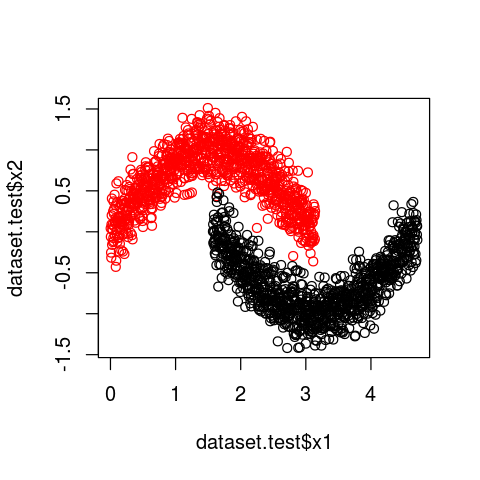

In [41]:
options(repr.plot.width=4, repr.plot.height=4)
par(mfrow=c(1,1))
plot(dataset.test$x1,dataset.test$x2,col=dataset.test$target)

In [42]:
pred <- predict(model,dataset.test[,1:2])
t_true <- dataset.test[,3]

table(pred,t_true)

    t_true
pred  -1   1
  -1 998   1
  1    2 999

compute testing error (in %)

In [43]:
(sum(pred != t_true)/length(t_true))

[1] 0.0015

 In a real setting we should also optimize the value of C, again with CV; all this can be done
 very conveniently using tune() to do automatic grid-search (very much as we did in the last
 laboratory for nnet() )

 other packages provide with heuristic methods to estimate the gamma in the RBF kernel (see below)

***

## Playing with the SVM for regression and 1D data


Now we do regression; we have an extra parameter: the 'epsilon', which controls the width of the 
epsilon-insensitive tube (in feature space)

In [32]:
A <- 20

 a really nice-looking function

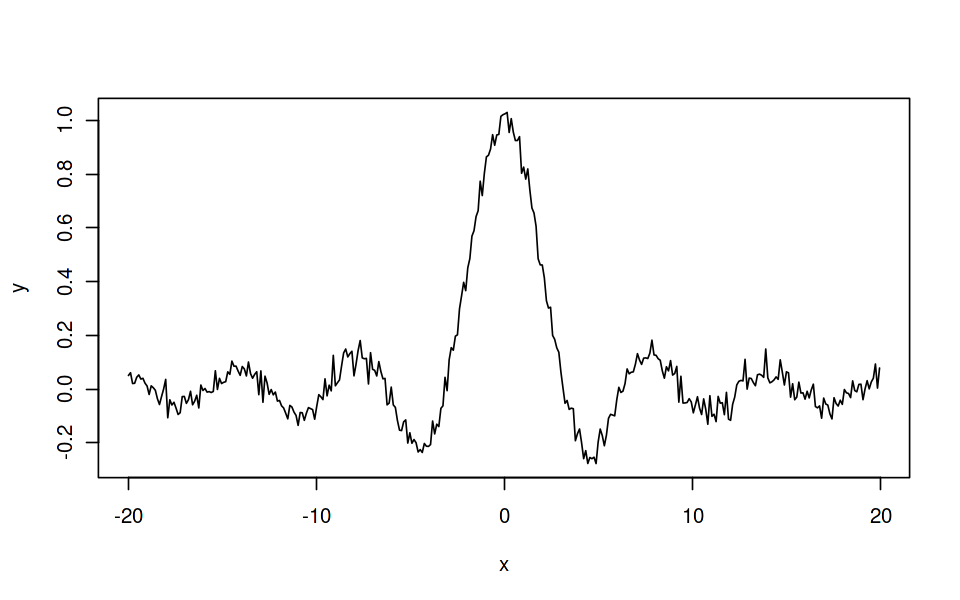

In [33]:
x <- seq(-A,A,by=0.11)
y <- sin(x)/x + rnorm(x,sd=0.03)

plot(x,y,type="l")

With this choice of the 'epsilon', 'gamma' and C parameters, the SVM underfits the data (blue line) 

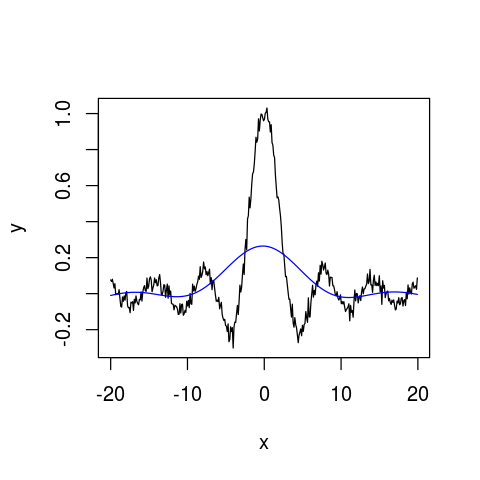

In [46]:
model1 <- svm (x,y,epsilon=0.01)
plot(x,y,type="l")
lines(x,predict(model1,x),col="blue")

With this choice of the 'epsilon', 'gamma' and C parameters, the SVM overfits the data (green line)

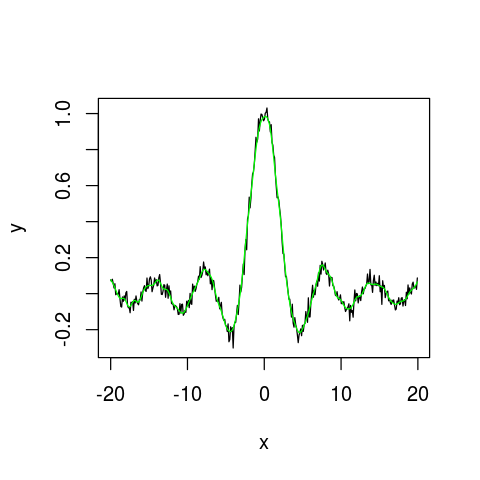

In [47]:
model2 <- svm (x,y,epsilon=0.01,gamma=200, C=100)
plot(x,y,type="l")
lines(x,predict(model2,x),col="green")

With this choice of the 'epsilon', 'gamma' and C parameters, the SVM has a very decent fit (red line)

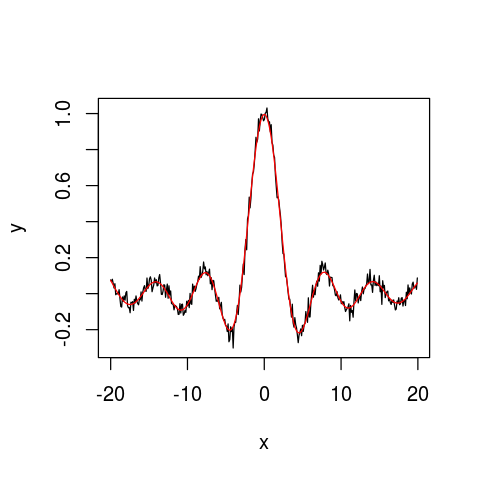

In [48]:
model3 <- svm (x,y,epsilon=0.01,gamma=10)
plot(x,y,type="l")
lines(x,predict(model3,x),col="red")

the other nice package where the SVM is located is {kernlab}

In [49]:
library(kernlab)

the ksvm() method has some nice features, as creation of user-defined kernels (not seen in this course)
 and automatic cross-validation (via the 'cross' parameter)